# Training Pipeline (LightGBM)
Machine Learning-Based Credit Card Transaction Fraud Detection

In [9]:
# uncomment if not installed already
# pip install pandas; pip install matplotlib; pip install sklearn; pip install lightgbm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import lightgbm as lgbm
from datetime import datetime

In [3]:
# read in the dataset
df = pd.read_csv('../Dataset/card-transaction-dataset.csv')

In [12]:
# check distribution
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
# encoding categorical data
y = df['Class']

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)
print(Y[500:600])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
X = df.drop(labels = ['Time','Class'],axis=1)
print(X.head)

<bound method NDFrame.head of                V1         V2        V3        V4        V5        V6   
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388  \
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21   
0       0.239599  0.098698  0.

In [6]:
# Extract column names
feature_names = np.array(X.columns)

In [16]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
# Split dataset into train test chucks
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=6)

In [18]:
# Let's do LGBM
d_train = lgbm.Dataset(X_train,label=Y_train)

lgbm_params = {'learning_rate':0.05,
               'boosting_type':'gbdt',
               'objective':'binary',
               'metric':['binary_logloss'],
               'num_leaves':80,'max_depth':10
               }

start = datetime.now()
classifier = lgbm.train(lgbm_params,d_train,50)
stop = datetime.now()
train_time = stop - start
print("Training duration :",train_time)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
Training duration : 0:00:09.896212


In [19]:
# Let's make predictions
Y_pred_lgbm = classifier.predict(X_test)

for i in range(0,X_test.shape[0]):
    if Y_pred_lgbm[i] >= .5:
        Y_pred_lgbm[i] = 1
    else:
        Y_pred_lgbm[i] = 0

print(log_loss(Y_test,Y_pred_lgbm))

0.025943432269825775


[[56845    19]
 [   22    76]]
Precission : [0.99961313 0.8       ]
Recall : [0.99966587 0.7755102 ]
F1-score : [0.9996395  0.78756477]


<Axes: >

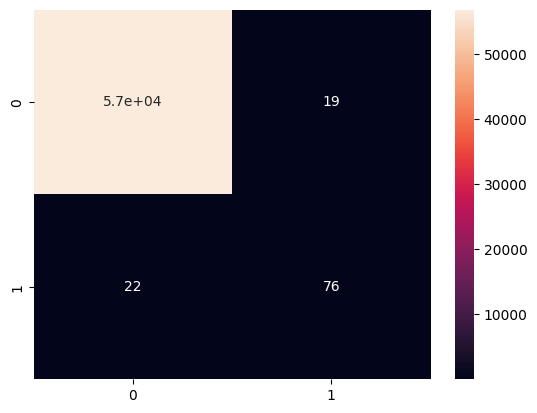

In [20]:
# create the confusion matrix
cf_lgbm = confusion_matrix(Y_test,Y_pred_lgbm)
print(cf_lgbm)
precision,recall,fscore,_ = precision_recall_fscore_support(Y_test,Y_pred_lgbm)
print("Precission :",precision)
print("Recall :",recall)
print("F1-score :",fscore)
sns.heatmap(cf_lgbm,annot=True)